In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [4]:
aapl = pd.read_csv("apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("VIX_2010.csv",index_col='Date',parse_dates=True)
sp500 = pd.read_csv("sp500_2010.csv",index_col='Date',parse_dates=True)

total_list = [aapl,amzn,ge,vix,sp500]

In [7]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700


In [9]:
apple_daily_returns = aapl['Adj Close'].pct_change(1).dropna()

In [11]:
apple_cumul = (1+apple_daily_returns).cumprod()-1

In [13]:
apple_cumul

Date
2010-01-04     0.015565
2010-01-05     0.017321
2010-01-06     0.001139
2010-01-07    -0.000712
2010-01-08     0.005932
                ...    
2021-08-30    22.695418
2021-08-31    22.495791
2021-09-01    22.601020
2021-09-02    22.777436
2021-09-03    22.878025
Name: Adj Close, Length: 2939, dtype: float64

In [15]:
def cumul_return(df,get_absolute = True):
    initial_price = df['Adj Close'].iloc[0]
    final_price = df['Adj Close'].iloc[-1]
    if get_absolute: 
        return final_price - initial_price
    else:
        return 100*((final_price - initial_price)/initial_price)

In [17]:
cumul_return(aapl)

147.8379945755005

In [19]:
cumul_return(aapl,get_absolute = False)

2287.802548057404

In [21]:
def cumulative_abs(df):
    df['Cumulative Absolute'] = df['Adj Close']-df['Adj Close'].iloc[0]
    return df
cumulative_abs(aapl)

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute
Date,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601
...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986


In [23]:
amzn = cumulative_abs(amzn)
ge = cumulative_abs(ge)
sp500 = cumulative_abs(sp500)

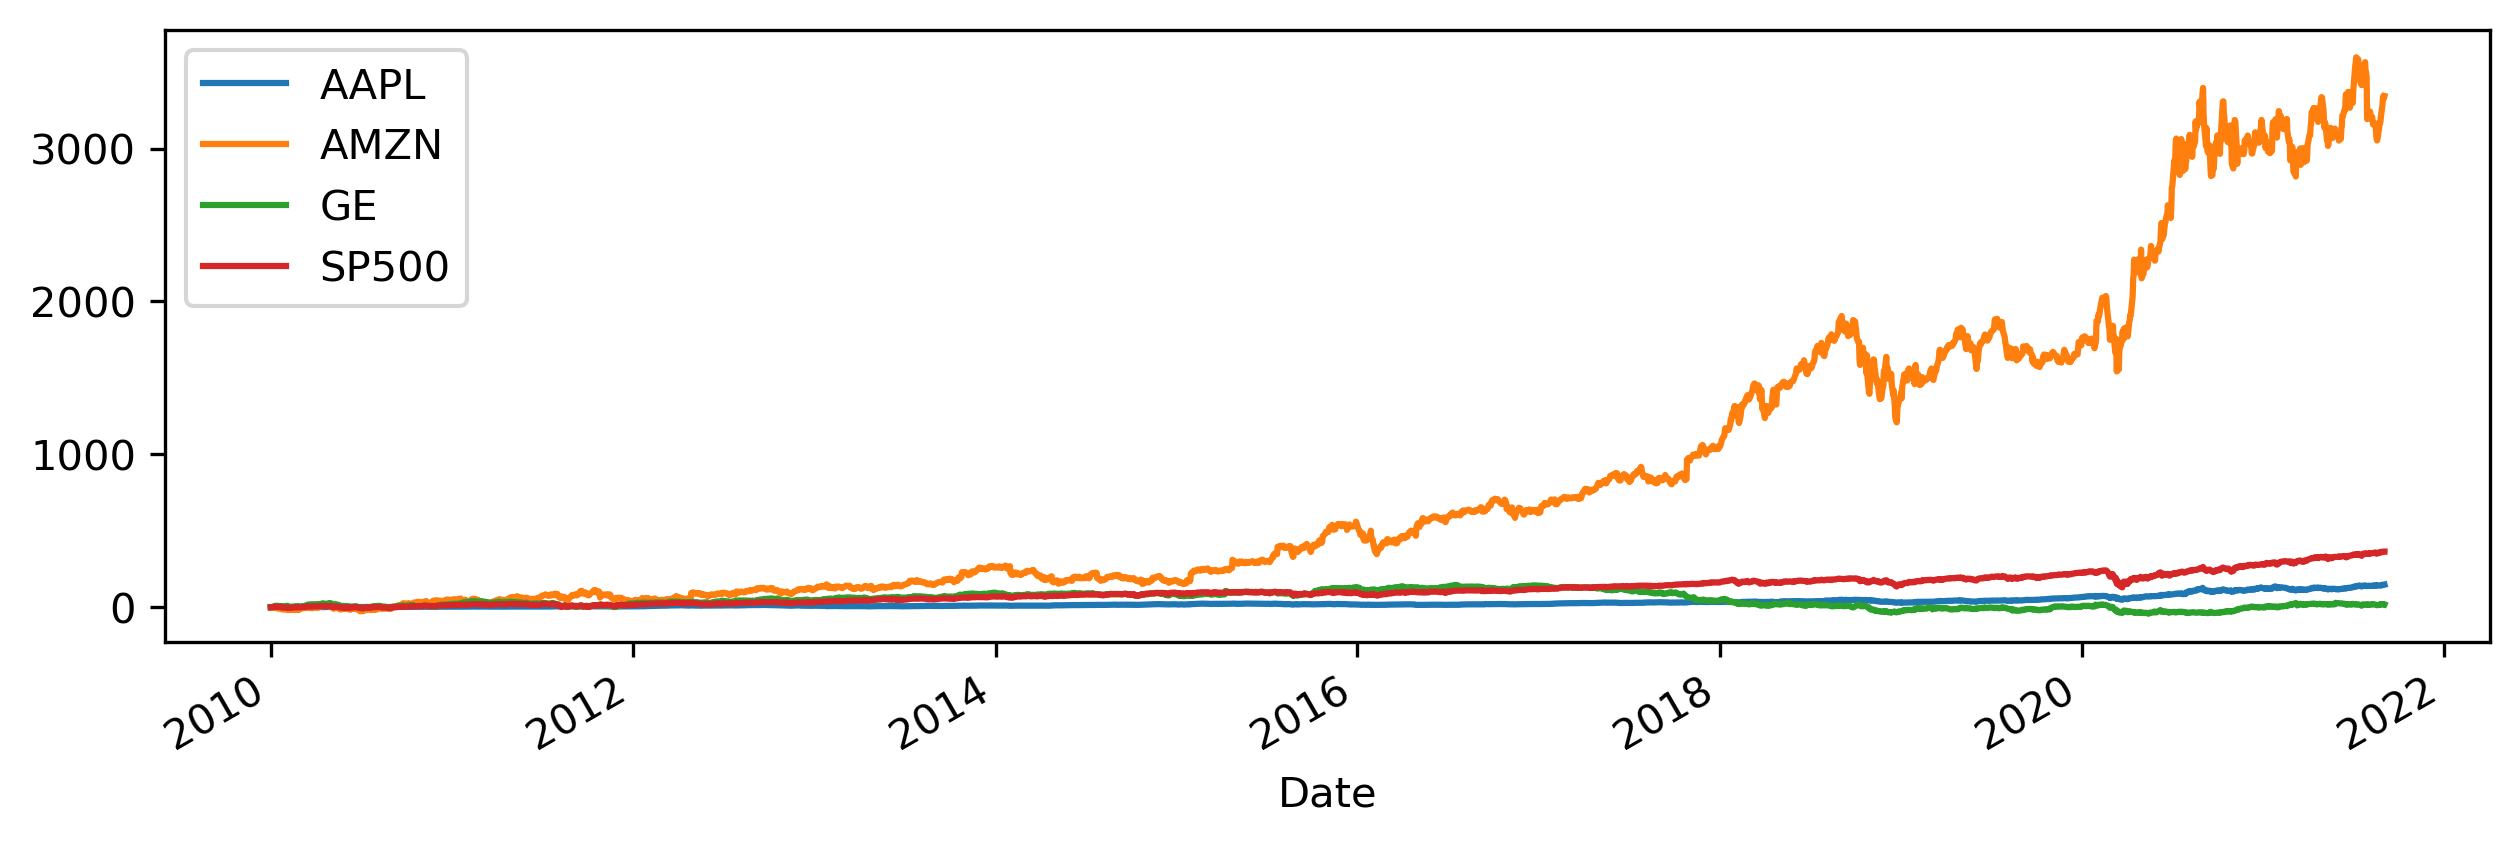

In [25]:
plt.figure(figsize = (10,3), dpi = 300)
aapl['Cumulative Absolute'].plot(label = 'AAPL')
amzn['Cumulative Absolute'].plot(label ='AMZN')
ge['Cumulative Absolute'].plot(label ='GE')
sp500['Cumulative Absolute'].plot(label ='SP500')
plt.legend()

In [27]:
def calc_cum_perc(df):
    df['Percent Change'] = 100*(df['Adj Close']-df['Adj Close'].iloc[0])/(df['Adj Close'].iloc[0])
    return df

appl = calc_cum_perc(aapl)
amzn = calc_cum_perc(amzn)
ge = calc_cum_perc(ge)
sp500 = calc_cum_perc(sp500)

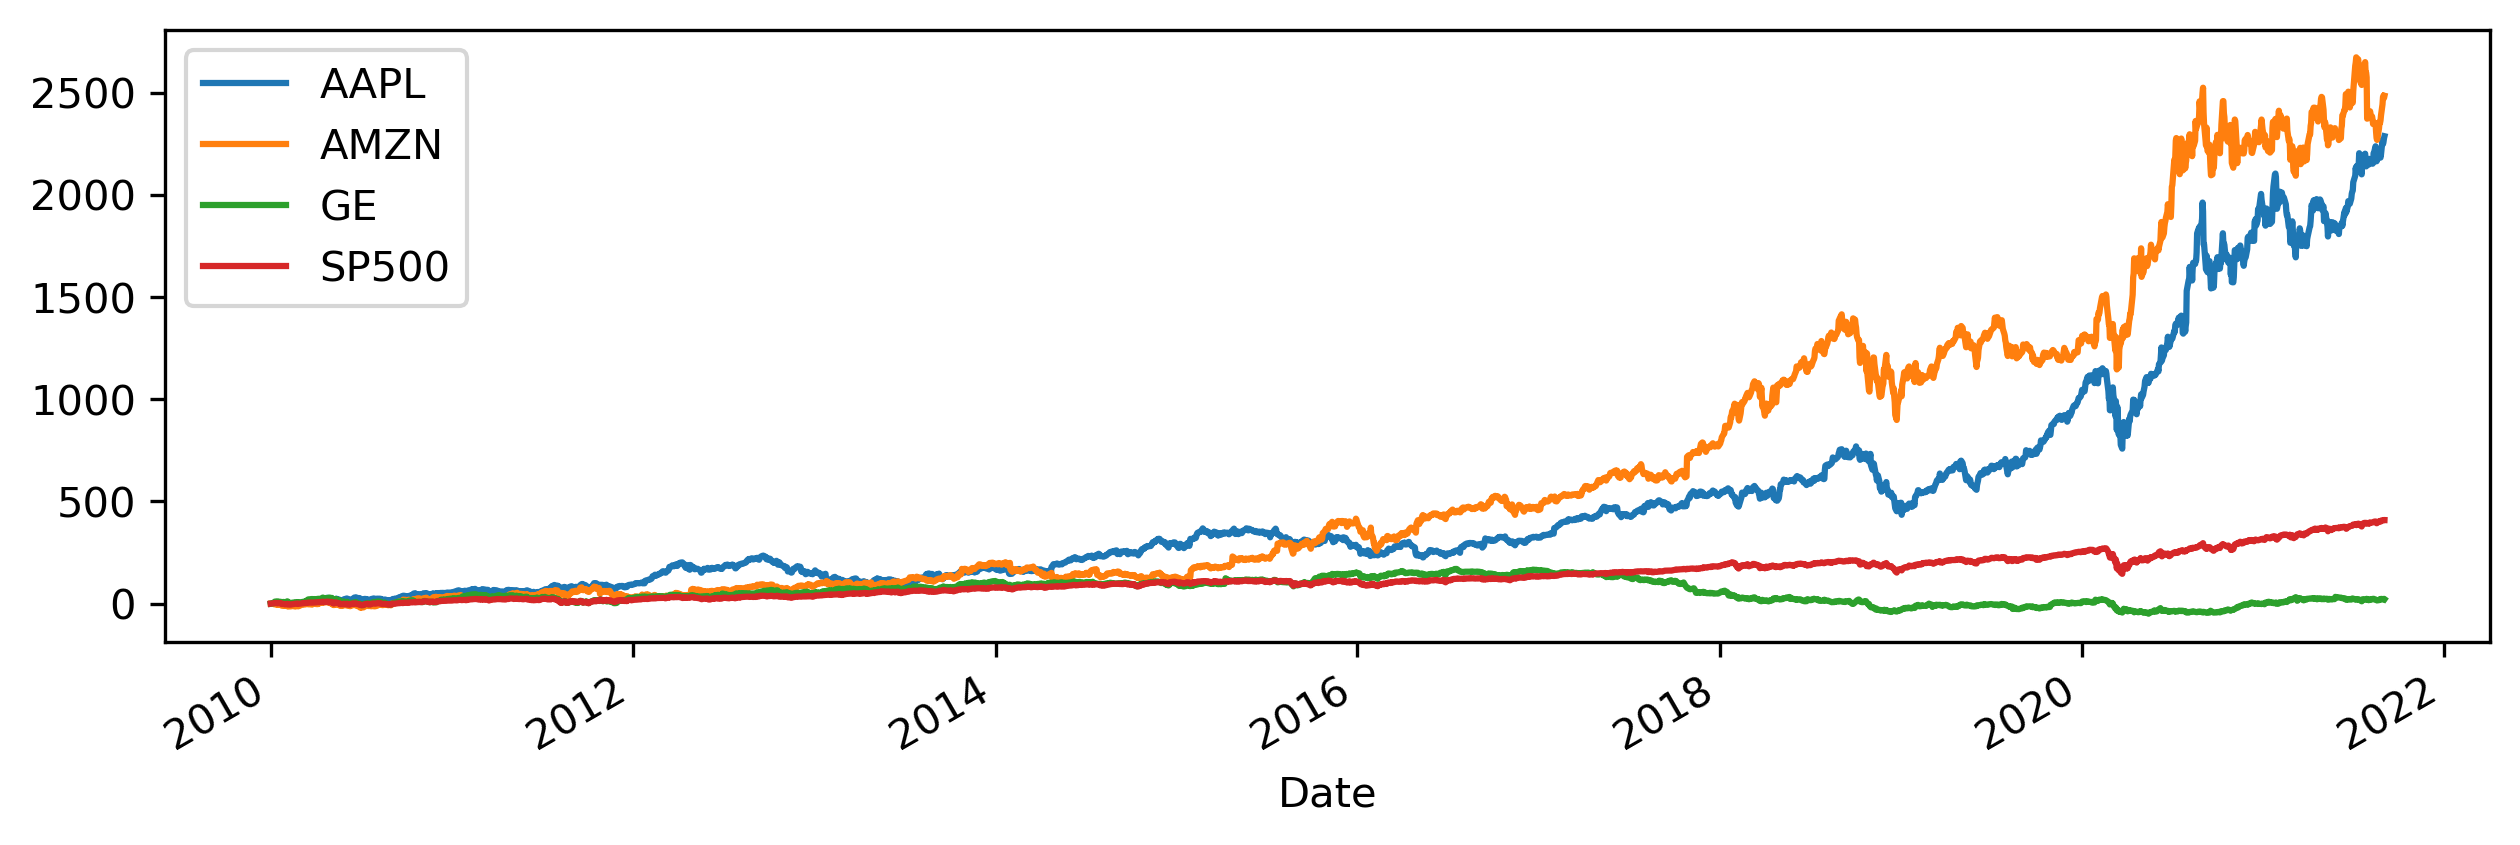

In [29]:
plt.figure(figsize = (10,3), dpi = 300)
appl['Percent Change'].plot(label = 'AAPL')
amzn['Percent Change'].plot(label = 'AMZN')
ge['Percent Change'].plot(label = 'GE')
sp500['Percent Change'].plot(label = 'SP500')
plt.legend()

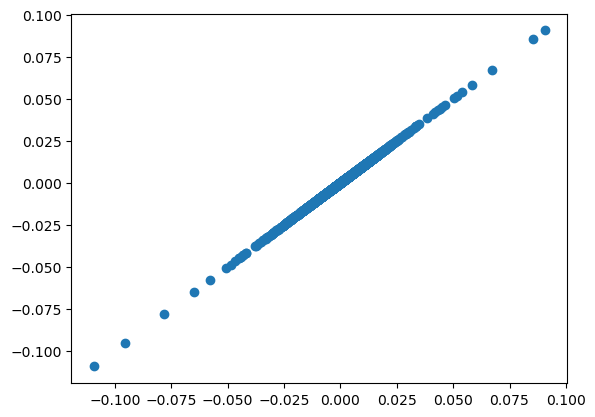

In [31]:
appl['Daily Returns'] = appl['Adj Close'].pct_change(1).dropna()
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1).dropna()
plt.scatter(sp500['Daily Returns'], sp500['Daily Returns'])

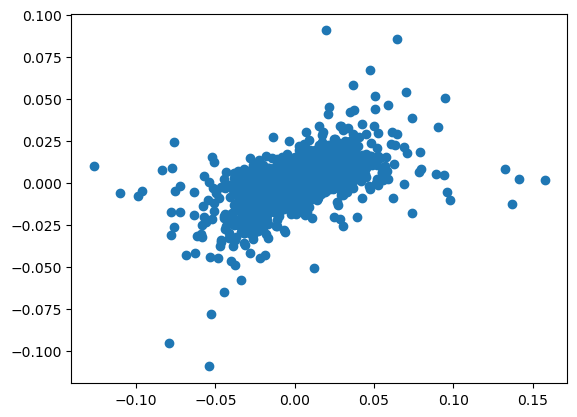

In [33]:
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1).dropna()
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1).dropna()
plt.scatter(amzn['Daily Returns'], sp500['Daily Returns'])

In [35]:
from scipy.stats import linregress

In [36]:
amzn['Daily Returns'] = amzn['Adj Close'].pct_change(1).dropna()
vix['Daily Returns'] = vix['Adj Close'].pct_change(1).dropna()
ge['Daily Returns'] = ge['Adj Close'].pct_change(1).dropna()
sp500['Daily Returns'] = sp500['Adj Close'].pct_change(1).dropna()
sp500

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute,Percent Change,Daily Returns
Date,,,,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,88.984848,90637900,0.000000,0.000000,NaN
2010-01-04,112.370003,113.389999,111.510002,113.330002,90.493996,118944600,1.509148,1.695960,0.016960
2010-01-05,113.260002,113.680000,112.849998,113.629997,90.733574,111579900,1.748726,1.965195,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,90.797455,116074400,1.812607,2.036984,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,91.180725,131091100,2.195877,2.467698,0.004221
...,...,...,...,...,...,...,...,...,...
2021-08-30,450.970001,453.070007,450.709991,452.230011,452.230011,48357400,363.245163,408.210129,0.004398
2021-08-31,452.130005,452.489990,450.920013,451.559998,451.559998,59300200,362.575150,407.457177,-0.001482
2021-09-01,452.559998,453.109985,451.549988,451.799988,451.799988,48721400,362.815140,407.726875,0.000531


In [46]:
amzn = amzn.dropna()
vix = vix.dropna()
sp500 = sp500.dropna()
ge = ge.dropna()
aapl = ge.dropna()
sp500

,Open,High,Low,Close,Adj Close,Volume,Cumulative Absolute,Percent Change,Daily Returns
Date,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,90.493996,118944600,1.509148,1.695960,0.016960
2010-01-05,113.260002,113.680000,112.849998,113.629997,90.733574,111579900,1.748726,1.965195,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,90.797455,116074400,1.812607,2.036984,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,91.180725,131091100,2.195877,2.467698,0.004221
2010-01-08,113.889999,114.620003,113.660004,114.570000,91.484131,126402800,2.499283,2.808661,0.003328
...,...,...,...,...,...,...,...,...,...
2021-08-30,450.970001,453.070007,450.709991,452.230011,452.230011,48357400,363.245163,408.210129,0.004398
2021-08-31,452.130005,452.489990,450.920013,451.559998,451.559998,59300200,362.575150,407.457177,-0.001482
2021-09-01,452.559998,453.109985,451.549988,451.799988,451.799988,48721400,362.815140,407.726875,0.000531


In [50]:
def alpha_and_beta(df):
    
    beta,alpha,*_= linregress(sp500['Daily Returns'], df['Daily Returns'])
    
    return beta, alpha



In [60]:
alpha_and_beta(vix)

(-5.899407949811439, 0.006742981581293553)

In [68]:
sp_lev_etf = pd.read_csv('sp_leveraged_2010.csv', index_col = 'Date', parse_dates = [0])
sp_lev_etf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,9.787500,9.787500,9.552500,9.560000,9.009787,33780400
2010-01-04,9.715000,9.887500,9.715000,9.867500,9.299584,43924400
2010-01-05,9.867500,9.937500,9.780000,9.932500,9.360847,38780400
2010-01-06,9.910000,9.990000,9.892500,9.940000,9.367911,42499600
2010-01-07,9.907500,10.047500,9.850000,10.022500,9.445668,45704800
...,...,...,...,...,...,...
2021-08-30,131.880005,133.119995,131.750000,132.619995,132.619995,1258900
2021-08-31,132.550003,132.779999,131.869995,132.309998,132.309998,1763600
2021-09-01,132.809998,133.139999,132.229996,132.380005,132.380005,1402900


In [72]:
sp_lev_etf = calc_cum_perc(sp_lev_etf)

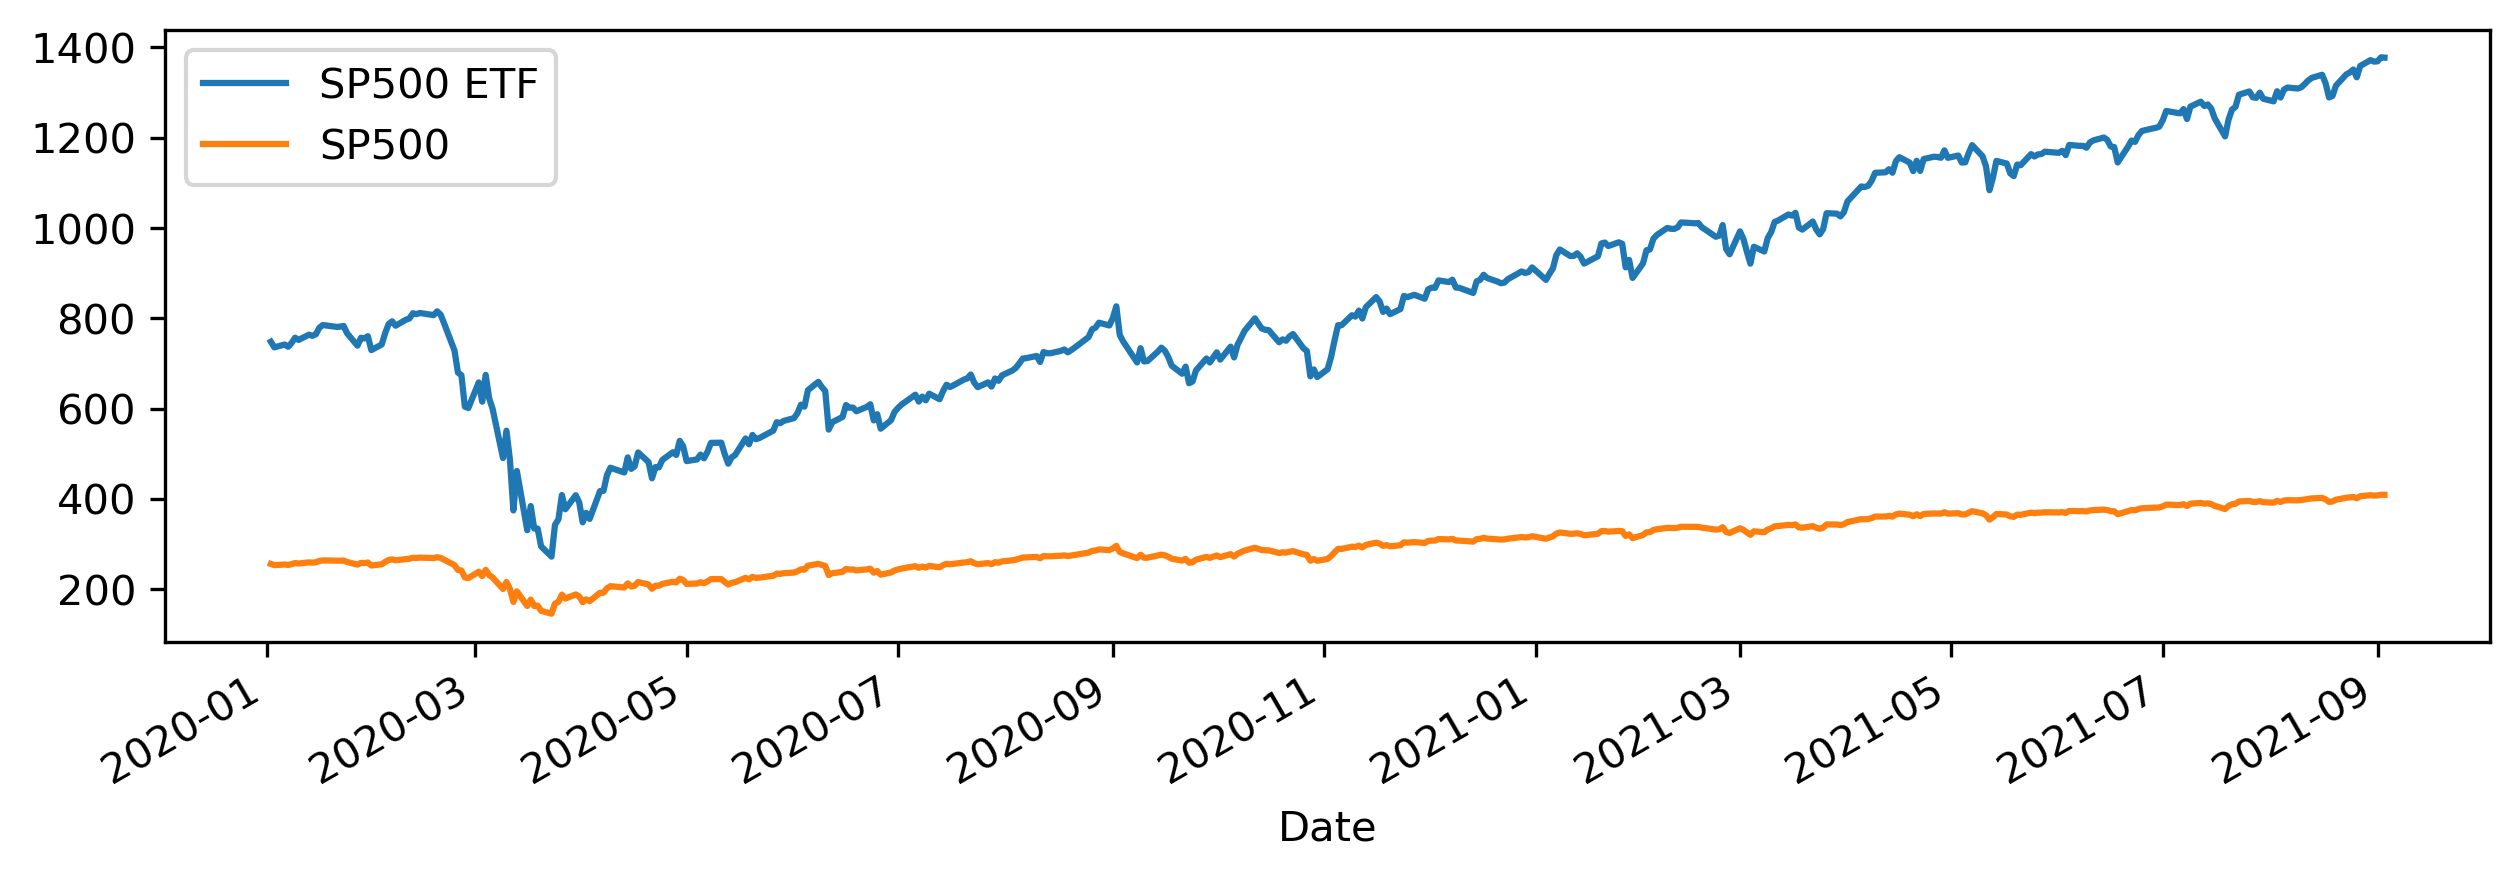

In [84]:
plt.figure(figsize = (10,3), dpi =300)
sp_lev_etf['Percent Change']['2020-01-01':'2021-12-31'].plot(label = 'SP500 ETF')
sp500['Percent Change']['2020-01-01':'2021-12-31'].plot(label = 'SP500')
plt.legend()

In [88]:
sp_lev_etf['Daily Returns'] = sp_lev_etf['Adj Close'].pct_change(1)

In [103]:
sp_lev_etf = sp_lev_etf.dropna()

In [107]:
alpha_and_beta(sp_lev_etf)


(2.0101356182990875, -7.749523800499149e-05)